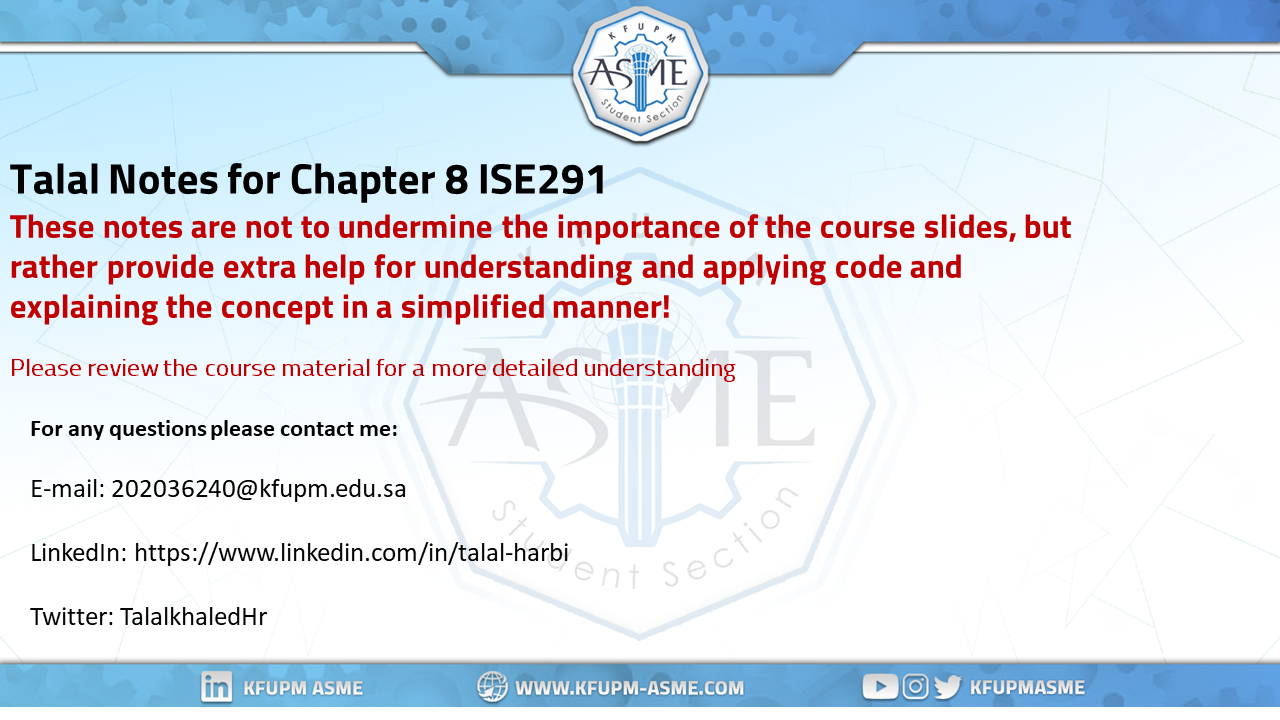

# Data Classification

- In regression, we had n numbers of input variables, and we wanted to study how those variables affected the **numerical** output variable.

- In classification, we also have n numbers of input variables, and also want to study how those variables affect their output variable. However, the main difference here is that the output variable is now **Categorical**

## Supervised Learning


- In supervised we have a data set where the **right** answers are **given** ( A corresponding output column)
- Supervised learning algorithms use a set of examples from previous records to make predictions about the future.
- Regression is a type of supervised learning method.

### In chapter 9, we will look at an unsupervised learning method, where a corresponding output column is not available. This method is known as clustering algorithm

### In this chapter, we learn about an important supervised learning method called data classification.

## Important terminologies

- Dependent/output variable is called as **label** (Since it contains categorical values)
- Independent/input variables are called as **features**

The classification problem can be divided into three major categories:
- One Class Classification Problem
- Binary Class Classification Problem
- Multi-Class Classification Problem

# Examples of different types of labels

- Binary >> True/False, 0/1, -1/1, 1/2, etc.
- Multi >> 1/2/3..., A/B/C..., Low/Mid/High, etc.

### When we study our data in, we always display the data. One of the reasons we do this first is to see how our data can be studied, what variables we have, and helps us describe our objectives when dealing with the data

In [106]:
import pandas as pd
df = pd.read_csv('data/Classification-1.csv', delimiter = ',')
display(df.head())

Color  Size       Act    Age Inflated
0  Yellow  Small  Stretch  Adult        T
1  Yellow  Small  Stretch  Adult        T
2  Yellow  Small  Stretch  Child        F
3  Yellow  Small      Dip  Adult        F
4  Yellow  Small      Dip  Child        F

### We can see that our data do not contain any numerical features. Therefore, if we want to build a prediction model, we must go with classification method

- Identifying the unique values within our variables/features can be helpful

In [107]:
seleted_cols = list(df.select_dtypes(include='object').columns)

for s in seleted_cols:
    print(df[s].unique())

['Yellow' 'Purple']
['Small' 'Large']
['Stretch' 'Dip']
['Adult' 'Child']
['T' 'F']


In regression, we had to identify our output variables, it is no different here as well.

Our Label/Output variable here must be "Inflated"

# Decision trees
###### There is no need for all this shit
The idea is to separate the classes

We see how input variables can be used to separate the classes by two groups

We use it to make decision by following the tree from its root node, until we reach a certain decision

# Measuring Entropy

## To build a decision tree we need to know what is Entropy Uncertainty

Entropy is a measure of disorder, uncertainty, the higher the entropy, the more uncertain you are ,or randomness calculated as $$ Entropy(A)=E(A) = - \sum_{i=1}^{k} p_{i} \log_{2}(p_{i}) $$
where $k$ is the total number of possible class values in attribute $A$, and $p_{i}$ is the proportion of occurrences of the class $i$ in the attribute.

#### Note: Entropy is positive value, and its in units called bits
##### Also, please be aware that the -ve sign is outside the summation

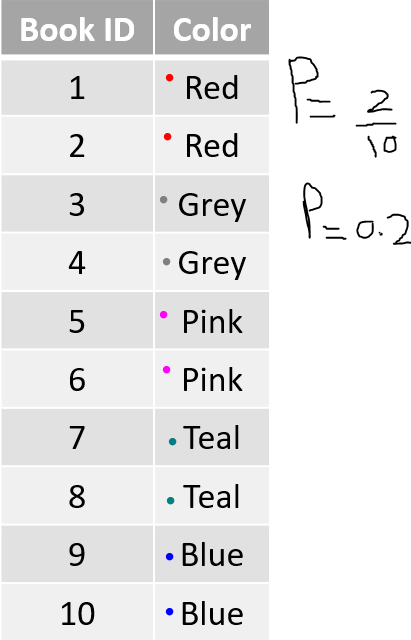

#### Entropy = 0, if you have all same values in a column: there is no uncertainity

## Conditional entropy

Adding new columns/variables can help reduce the uncertainity.

This is the idea of a D-Tree.

Example:

We have an output of text books colors, and their subjects.

our output column is colors, and subject is one of the input columns that will be used in a D-Tree to help reduce entropy

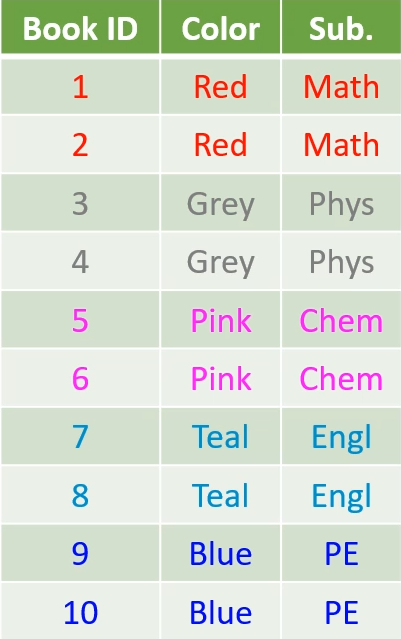

E(COLOR|SUBJECT) = 0

The reason being is that every subject has a destict color.

Entropy = 0 means that there exists no uncertainity, which means that given a subject, we will know the color of the text book

## Manually calculating Entropy

- Measure the proportion **p**: See how frequent a certain value has occurred. In this case, all values have occurred twice out of ten times

- Go over each value, provided you know its occurrence/frequency **p** and use this formula $$p_{i} \log_{2}(p_{i}) $$

- Sum all your values
- Multiply by a negative sign

The reason why Entropy is positive is that because p is always <=1, so plugging in a logarithmic function makes it negative, so you are adding negative values and then multiplying by a negative gives a positive value

## Using Python to calculate Entropy

### The example given in course where you have to outcomes (True or False, coin flipping, etc.)

In calculating the entropy for one side of the outcomes, we add the complement of the other outcome.

We a have a probability of True that is changing, and we want to calculate the entropy of this probability.

The entropy of each probability = $$-(p_{i} \log_{2}(p_{i}) + q_{i}\log_{2}(q_{i}))$$

Where $$q_{i} = p_{i} - 1$$

In [108]:
def entropy(p):
    P = - p*np.log2(p)- (1-p)*np.log2(1-p)
    return round(P,3)

In [109]:
import numpy as np
portions=np.linspace(0.1,0.9,9) ## 9 values from 0.1 to 0.9

for p in portions:
    print(entropy(p),end=" | ")

0.469 | 0.722 | 0.881 | 0.971 | 1.0 | 0.971 | 0.881 | 0.722 | 0.469 | 

In [110]:
## Using python libraries

from scipy.stats import entropy

for p in portions:
    print(entropy([p,1-p], base=2),end=" | ")

0.46899559358928117 | 0.7219280948873623 | 0.8812908992306927 | 0.9709505944546688 | 1.0 | 0.9709505944546688 | 0.8812908992306926 | 0.7219280948873623 | 0.46899559358928117 | 

# Information Gain (IG)

Measures how much a particular feature reduces uncertainty in predicting the outcome.$$IG = Entropy(A)-Entropy(A|B)$$

In [111]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Classification-1.csv', delimiter = ',')
display(df.head())

Color  Size       Act    Age Inflated
0  Yellow  Small  Stretch  Adult        T
1  Yellow  Small  Stretch  Adult        T
2  Yellow  Small  Stretch  Child        F
3  Yellow  Small      Dip  Adult        F
4  Yellow  Small      Dip  Child        F

## Calculate Entropy of Inflated and Inflated|Act

In [112]:
from scipy.stats import entropy
probs=df['Inflated'].value_counts()/len(df.index) #get probabilities
display(probs.tolist())
E_inflated=entropy(probs,base=2) ## ==> probs list is just p & 1-p. In general, all probabilties in a single coloumn should
## Add to 1


print(f'E(Inflated) = {E_inflated: 0.4f}.')

[0.6, 0.4]

E(Inflated) =  0.9710.


In [113]:
import numpy as np
from scipy.stats import entropy
split = pd.crosstab(df['Inflated'],df['Act']) ## We have both Inflated and Act
print(split,'\n\n')

## We now have our split table, we can create a probability table from it

Act       Dip  Stretch
Inflated              
F           8        4
T           0        8 




In [114]:
Split_Probs=split/split.sum()
print(Split_Probs,'\n\n')

Act       Dip   Stretch
Inflated               
F         1.0  0.333333
T         0.0  0.666667 




In [115]:
E_inflated_Dip=entropy(Split_Probs['Dip'],base=2)
E_inflated_Stretch=entropy(Split_Probs['Stretch'],base=2)

print(E_inflated_Dip,E_inflated_Stretch)

0.0 0.9182958340544894


In [116]:
probs=df['Act'].value_counts()/len(df.index) #get probabilities for Act
## We use Split_Probs to calculate our entropies and probs to calculate our conditional entropy

print(probs)
E_inflated_act =np.average([E_inflated_Dip,E_inflated_Stretch],weights=[probs['Dip'],probs['Stretch']])

# E_inflated_act = (E_inflated_Dip*probs['Dip']) + (E_inflated_Stretch*probs['Stretch']),
#this is the meaning of the function above

print(f'E(Inflated|Act) = {E_inflated_act: 0.4f}.')

Stretch    0.6
Dip        0.4
Name: Act, dtype: float64
E(Inflated|Act) =  0.5510.


In [117]:
## Nowe we can calculate Information Gain (IG)

IG = E_inflated - E_inflated_act
print(f'The information gain is {IG:0.4f}.')

The information gain is 0.4200.


# Decision Tree

Color  Size       Act    Age Inflated
0  Yellow  Small  Stretch  Adult        T
1  Yellow  Small  Stretch  Adult        T
2  Yellow  Small  Stretch  Child        F
3  Yellow  Small      Dip  Adult        F
4  Yellow  Small      Dip  Child        F

Color_Yellow  Size _Small  Act_Stretch  Age_Child  Inflated_T
0              1            1            1          0           1
1              1            1            1          0           1
2              1            1            1          1           0
3              1            1            0          0           0
4              1            1            0          1           0
5              1            0            1          0           1
6              1            0            1          0           1
7              1            0            1          1           0
8              1            0            0          0           0
9              1            0            0          1           0
10             0            1            1          0           1
11             0            1            1          0           1
12             0            1            1          1           0
13             0            1            0          0           0
14             0            1            0          1           0
15             0            0            1          0           1
16             0            0            1          0           1
17             0            0            1          1           0
18             0            0            0          0           0
19             0            0            0          1           0

[0 1] Using the order in this list, in the parameter 'class_names', name your classes
Since our dummy variable is Inflated_T, this means that 0 is F and 1 is T


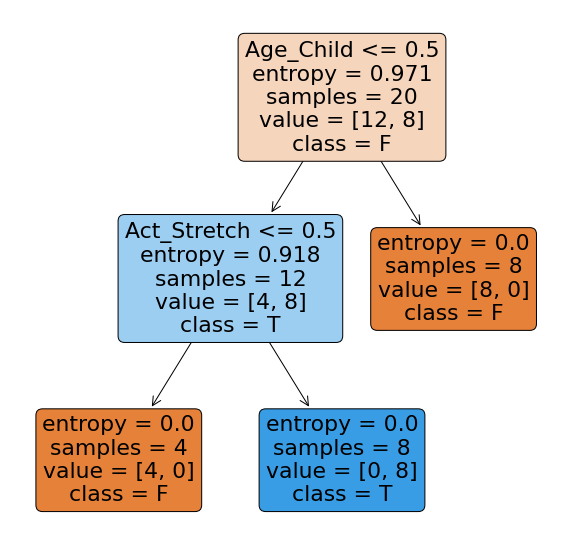

In [118]:
df = pd.read_csv('data/Classification-1.csv', delimiter = ',')
display(df.head())

from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
ndf = pd.get_dummies(df,drop_first=True)
display(ndf)
clf = clf.fit(ndf.drop('Inflated_T', axis=1), ndf['Inflated_T'])

print(clf.classes_,"Using the order in this list, in the parameter 'class_names', name your classes\nSince our dummy variable is Inflated_T, this means that 0 is F and 1 is T")
##Read the above line down below
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plot_tree(clf,
          feature_names=ndf.columns[0:-1], ## We exclude the output column
          class_names=['F','T'],  # the order of the classes can be obtained from clf.classess_
          filled=True,rounded=True
         ) # # clf.classes_   #to know the classes

plt.show()

# Decision rules

- Typically of the form>> $$\text{if condition, then result.}$$
- A rule by itself is not a model.
- The prediction model is composed of a set of rules (or knowledge base) that work together to make the prediction model.

From the above tree, we get the following three rules for the three leaf nodes:
1. If (Age = Child), then (Inflated = F)
2. If (Age = Adult) and (Act = Dip), then (Inflated = F)
3. If (Age = Adult) and (Act = Stretch), then (Inflated = T)

## Classification Rules and Association Rules
 Classification Rules: 
 - The rules that are obtained from tree, which can be used for predicting the class label are **classification rules**.
 - One rule is generated for each leaf, and the consequent of the rule is the class assigned by the leaf.
 - Sometimes, rules that are read directly off a decision tree are far more complex than necessary.
 - Typically rules derived from trees are pruned to remove redundant tests.
 
Association Rules:  
- Association Rules are similar to the classification rules.
- Association Rules can predict any attribute, not just the class.
- Association Rules have the freedom to predict the combination of attributes.
- The coverage of an association rule is the number of instances for which it predicts correctly, this is often called as its **support**.
- Its **accuracy**, often called **confidence**, is the number of instances that it predicts correctly, expressed as a proportion of all instances to which it applies.

### Let us build a decision tree to write down our Classification/Decision Rules and Association Rules

In [119]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('data/Classification-2.csv', delimiter = ',')
display(df.head())
ndf = pd.get_dummies(df,drop_first=True)
display(ndf.head())

outlook temperature humidity  windy play
0     sunny         Hot     High  False   no
1     sunny         Hot     High   True   no
2  overcast         Hot     High  False  yes
3     rainy        Mild     High  False  yes
4     rainy        Cool   Normal  False  yes

windy  outlook_rainy  outlook_sunny  temperature_Hot  temperature_Mild  \
0  False              0              1                1                 0   
1   True              0              1                1                 0   
2  False              0              0                1                 0   
3  False              1              0                0                 1   
4  False              1              0                0                 0   

   humidity_Normal  play_yes  
0                0         0  
1                0         0  
2                0         1  
3                0         1  
4                1         1

## We want our decision tree to capture if we can or can not play

In [120]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
clf = clf.fit(ndf.drop('play_yes', axis=1), ndf['play_yes'])
print(ndf.columns[0:-1])
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10),dpi=1000)
plot_tree(clf,feature_names=ndf.columns[0:-1],class_names=['No','Yes'],filled=True,rounded=True);  
plt.show()

Index(['windy', 'outlook_rainy', 'outlook_sunny', 'temperature_Hot',
       'temperature_Mild', 'humidity_Normal'],
      dtype='object')


#### We can write many classification rules from this tree to predict if play is yes or no, 7 to be exact, let us write them all. You do not need to memorize all of them if you know the way <img src="img/SECRET.png" width=15 height=50/>

#### But first let us agree on which direction to go if the answer is yes or no

- Always got to the right if the answer is yes or True in general, and to the left if the answer is no
- Humidity is either normal or high, our decision tree has starts with humidity_normal, this means if we want to see what happens IF humidity is actually normal, we go to the right AKA, humidity = normal is True
- Knowing these two points, try to build decision rules yourself before you check the answers

# Please do it yourself for the sake of practice

### Do not bother this text it is just to hide the answers
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p><p>rew consequuntur voluptatem sit unde illum eos ipsum eligendi est possimus consequuntur ad consequatur debitis! Et laudantium quisquam ut sunt consequuntur et dolore officiis ut quisquam esse qui consequatur molestias qui adipisci perspiciatis est omnis explicabo. </p>
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe.
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p><p>rew consequuntur voluptatem sit unde illum eos ipsum eligendi est possimus consequuntur ad consequatur debitis! Et laudantium quisquam ut sunt consequuntur et dolore officiis ut quisquam esse qui consequatur molestias qui adipisci perspiciatis est omnis explicabo. </p>
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p><p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p><p>rew consequuntur voluptatem sit unde illum eos ipsum eligendi est possimus consequuntur ad consequatur debitis! Et laudantium quisquam ut sunt consequuntur et dolore officiis ut quisquam esse qui consequatur molestias qui adipisci perspiciatis est omnis explicabo. </p>
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe.
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p><p>rew consequuntur voluptatem sit unde illum eos ipsum eligendi est possimus consequuntur ad consequatur debitis! Et laudantium quisquam ut sunt consequuntur et dolore officiis ut quisquam esse qui consequatur molestias qui adipisci perspiciatis est omnis explicabo. </p>
<p>Lorem ipsum dolor sit amet. Ut quia incidunt in dolores incidunt nam architecto voluptas eum doloribus facilis qui repellendus consequuntur aut nemo deserunt aut quas quia. Ut natus dolores rem sapiente aliquam ea dolor Quis et voluptas consequuntur. Id odio minima non nesciunt voluptas qui nemo atque. </p><p>Est voluptates voluptatum ut omnis sequi et distinctio soluta ut cumque aspernatur est voluptates veniam est dolore temporibus est iure quisquam. Sed molestias quia aut nemo voluptatem ad temporibus omnis aut alias odit. Et doloribus animi et eveniet rerum aut dolor doloremque aut accusantium facere eum sint saepe. </p>

### All possible rules when humidity = Normal

- If humidity = normal, and outlook = rainy, and windy = True, then play = no
- If humidity = normal and outlook = rainy, and windy = False, then play = yes
- If humidity = normal and outlook = Not rainy, then play = yes

### All possible rules when humidity = High (Not Normal)
- If humidity = Not normal, and outlook = sunny, then play = no
- If humidity = Not normal, and outlook = NOT sunny, and windy = True, and outlook = rainy, then play = no
- If humidity = Not normal, and outlook = NOT sunny, and windy = True, and outlook = NOT rainy, then play = yes
- If humidity = Not normal, and outlook = NOT sunny, and windy = False, then play = yes

## Association Rules

Remember that our association rules does not come from our decision tree, it comes from our data

The only limit in association rules is the available data and our objectives from those data and the way we construct our tables

For example

In [121]:
## We want to build association rules regarding temperature and humidity

display(df.loc[:,['temperature','humidity']].sort_values(by='humidity'))

temperature humidity
0          Hot     High
1          Hot     High
2          Hot     High
3         Mild     High
7         Mild     High
11        Mild     High
13        Mild     High
4         Cool   Normal
5         Cool   Normal
6         Cool   Normal
8         Cool   Normal
9         Mild   Normal
10        Mild   Normal
12         Hot   Normal

From the above tables one can identify:
 - If temperature = mild, then humidity = high  
 the above rule has coverage/support of 4, and accuracy/confidence of 66.66%.
 - If temperature = cool, then humidity = normal  
 the above rule has coverage/support of 4, and accuracy/confidence of 100%.

In [122]:
# We want to build association rules regarding outlook when it is rainy, temperature when it is mild, 
# to see how it affects the "humidity"

selected_rows=(df['outlook']=='rainy') & (df['temperature']=='Mild')

display(df.loc[selected_rows,['outlook','temperature','humidity']])

outlook temperature humidity
3    rainy        Mild     High
9    rainy        Mild   Normal
13   rainy        Mild     High

From the above tables one can identify:

- If outlook = rainy, and temperature = Mild, then Humidity = High

the above rule has coverage/support of 2, and accuracy/confidence of 66.67%.

# Random forest

Remember that in chapter 7 we leaned about penalized regression to solve the problem of overfitting, decision rules also have the same problem when encountering new data.

So, we grow many decision trees that are randomly paralyzed (randomly remove records and/or columns), and have them vote for an outcome (Similar solution to our regression problem)

This solution results in multiple random decision trees, called as random forest.

In [123]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
# from sklearn.tree import plot_tree

df = pd.read_csv('data/Classification-2.csv', delimiter = ',')
ndf = pd.get_dummies(df,drop_first=True)

display(ndf)

windy  outlook_rainy  outlook_sunny  temperature_Hot  temperature_Mild  \
0   False              0              1                1                 0   
1    True              0              1                1                 0   
2   False              0              0                1                 0   
3   False              1              0                0                 1   
4   False              1              0                0                 0   
5    True              1              0                0                 0   
6    True              0              0                0                 0   
7   False              0              1                0                 1   
8   False              0              1                0                 0   
9   False              1              0                0                 1   
10   True              0              1                0                 1   
11   True              0              0                0                 1   
12  False              0              0                1                 0   
13   True              1              0                0                 1   

    humidity_Normal  play_yes  
0                 0         0  
1                 0         0  
2                 0         1  
3                 0         1  
4                 1         1  
5                 1         0  
6                 1         1  
7                 0         0  
8                 1         1  
9                 1         1  
10                1         1  
11                0         1  
12                1         1  
13                0         0

In [124]:
rfClassifier = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)#max_features=auto default,
rfClassifier = rfClassifier.fit(ndf.drop('play_yes', axis=1), ndf['play_yes'])

In [125]:
fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rfClassifier.estimators_[index],
                   feature_names = ndf.columns[0:-1], 
                   class_names=['no','yes'],
                   filled = True,
                   max_depth=2,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)

## Bayes Theorem

$$P(c|x)=\frac{P(x|c)P(c)}{P(x)}$$

where
- $P(c|x)$ is the posterior probability of class (c, target) given predictor (x, attributes).
- $P(c)$ is the prior probability of class.
- $P(x|c)$ is the likelihood, which is the probability of predictor given class.
- $P(x)$ is the prior probability of predictor.

#### <mark>Bayes Theorem is helpful in calculating Conditional probabilities</mark>

## Naive Bayes Equation

The classifier works on the following:

$$P(c|x_1,x_2, \ldots, x_n)=\frac{P(x_1|c)P(x_2|c)P(x_3|c) \cdots P(x_n|c)P(c)}{P(x_1)P(x_2) \cdots P(x_n)}$$

To create a Naive Bayes classifier we need a Likely hood table

In [126]:
df = pd.read_csv('data/Classification-2.csv', delimiter = ',')
display(df)

outlook temperature humidity  windy play
0      sunny         Hot     High  False   no
1      sunny         Hot     High   True   no
2   overcast         Hot     High  False  yes
3      rainy        Mild     High  False  yes
4      rainy        Cool   Normal  False  yes
5      rainy        Cool   Normal   True   no
6   overcast        Cool   Normal   True  yes
7      sunny        Mild     High  False   no
8      sunny        Cool   Normal  False  yes
9      rainy        Mild   Normal  False  yes
10     sunny        Mild   Normal   True  yes
11  overcast        Mild     High   True  yes
12  overcast         Hot   Normal  False  yes
13     rainy        Mild     High   True   no

In [127]:
## This method is only to help you in your project and is not part of the course. However, the concept of a likely hood table,
## is still required from you

#############################################################################################################

#                                             PLEASE READ THE FOLLOWING NOTE

#############################################################################################################
## If you found this method helpful and would like to use it in your project, I kindly ask that you give me credit by
## referencing and mentioning me in your project. This would be greatly appreciated and would help others find my work.
## Thank you for your understanding and support!
## Talal Khaled Alharbi
from fractions import Fraction
import pandas as pd
def likelyHoodTable(dataFrame,feature, label): ## This method can only produce a likely hood table for two variables only
    df = dataFrame
    inputColumns = df[feature].unique()
    outputColumns = df[label].unique()
    likelihood_table = pd.DataFrame(columns=outputColumns, index=inputColumns)
    likelihood_table = likelihood_table.assign(fractions=0)## Add fraction column

    likelihood_table.loc['Total'] = 0 ## Total row
    likelihood_table.loc['Total_Fraction'] = 0 ## Total fraction row
    total = 0
    for i,lable in enumerate( pd.crosstab(df[feature],df[label]).index):

        likelihood_table.loc[lable,outputColumns[0]] = pd.crosstab(df[feature],df[label]).iloc[i,0]
        likelihood_table.loc[lable,outputColumns[1]] = pd.crosstab(df[feature],df[label]).iloc[i,1]
        total+=pd.crosstab(df[feature],df[label]).iloc[i,0]+pd.crosstab(df[feature],df[label]).iloc[i,1]
        likelihood_table.iloc[3,0]= sum(pd.crosstab(df[feature],df[label]).iloc[:,0])
        likelihood_table.iloc[3,1]= sum(pd.crosstab(df[feature],df[label]).iloc[:,1])


    likelihood_table.iloc[0,2] = Fraction(sum(likelihood_table.iloc[0,:]),total, _normalize=False)
    likelihood_table.iloc[1,2] = Fraction(sum(likelihood_table.iloc[1,:]),total, _normalize=False)
    likelihood_table.iloc[2,2] = Fraction(sum(likelihood_table.iloc[2,:]),total, _normalize=False)

    likelihood_table.iloc[4,0] = Fraction(likelihood_table.iloc[3,0],total, _normalize=False)
    likelihood_table.iloc[4,1] = Fraction(likelihood_table.iloc[3,1],total, _normalize=False)

    likelihood_table.iloc[4,2] = ''
    likelihood_table.iloc[3,2] = ''
    return likelihood_table



In [128]:
## This method is only to help you in your project and is not part of the course. However, the concept of a likely hood table,
## is still required from you

#############################################################################################################

#                                             PLEASE READ THE FOLLOWING NOTE

#############################################################################################################
## If you found this method helpful and would like to use it in your project, I kindly ask that you give me credit by
## referencing and mentioning me in your project. This would be greatly appreciated and would help others find my work.
## Thank you for your understanding and support!
## Talal Khaled Alharbi
from fractions import Fraction
import pandas as pd
def likelyHoodTable2(dataFrame, feature, label):
    df = dataFrame
    inputColumns = df[feature].unique()
    outputColumns = df[label].unique()
    likelihood_table = pd.DataFrame(columns=outputColumns, index=inputColumns)
    likelihood_table = likelihood_table.assign(fractions=0)  ## Add fraction column

    likelihood_table.loc['Total'] = 0  ## Total row
    likelihood_table.loc['Total_Fraction'] = 0  ## Total fraction row
    total = 0
    for i, feature_value in enumerate(inputColumns):
        row_total = 0
        for j, label_value in enumerate(outputColumns):
            count =sum( ((df[feature] == feature_value) & (df[label] == label_value)))
            likelihood_table.iloc[i, j] = count
            row_total += count
            total += count

        likelihood_table.iloc[i, -1] = row_total
    
    for  i, feature_value in enumerate(inputColumns):
        likelihood_table.iloc[i, -1] = Fraction(likelihood_table.iloc[i, -1], total, _normalize=False)
    for j, label_value in enumerate(outputColumns):
        totalCol = likelihood_table[label_value].sum()
        likelihood_table.loc['Total', label_value] = totalCol
        likelihood_table.loc['Total_Fraction', label_value] = Fraction(totalCol, total, _normalize=False)

    likelihood_table.iloc[-1, -1] = ''
    likelihood_table.iloc[-2, -1] = ''

    return likelihood_table

### !!!!!!!!!!!!!!!!!!!Delete this later!!!!!!!!!!!!!!!!!!!
Lecture 27, minute 59, Dr Talks about props and stuff, really important to watch
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [129]:
## Following code can be used to print the prior and likelihood probabilities


df = pd.read_csv('data/Classification-2.csv', delimiter = ',')
x = df.drop('play',axis=1).values
y = df['play'].values 
display(df)

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

encoder1 = OrdinalEncoder()
x = encoder1.fit_transform(x)
# display(x,y)

from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(x,y)

classes=encoder.inverse_transform([NBClf.classes_[0], NBClf.classes_[1]]).tolist()
print('\n')
print('Class Priors:')
print(f'P(Class 1):= {np.exp(NBClf.class_log_prior_[0]):0.4f} \t P(Class 2):= {np.exp(NBClf.class_log_prior_[1]):0.4f}')

print('\n')
for ind,prob in enumerate(NBClf.feature_log_prob_):
    row=classes  # the classes labels from encoder.inverse_transform, default in the alphabetical order 
    col=np.sort(df.iloc[:,ind].unique())  # default in the alphabetical order 
    df1 = pd.DataFrame(np.round(np.exp(prob),decimals=3),columns=col,index=row)
    print(f'Likelihood probabilities for {df.columns[ind]}:') 
    display(df1)
    print('\n') 


outlook temperature humidity  windy play
0      sunny         Hot     High  False   no
1      sunny         Hot     High   True   no
2   overcast         Hot     High  False  yes
3      rainy        Mild     High  False  yes
4      rainy        Cool   Normal  False  yes
5      rainy        Cool   Normal   True   no
6   overcast        Cool   Normal   True  yes
7      sunny        Mild     High  False   no
8      sunny        Cool   Normal  False  yes
9      rainy        Mild   Normal  False  yes
10     sunny        Mild   Normal   True  yes
11  overcast        Mild     High   True  yes
12  overcast         Hot   Normal  False  yes
13     rainy        Mild     High   True   no



Class Priors:
P(Class 1):= 0.3571 	 P(Class 2):= 0.6429


Likelihood probabilities for outlook:


overcast  rainy  sunny
no      0.000  0.400  0.600
yes     0.444  0.333  0.222



Likelihood probabilities for temperature:


Cool    Hot   Mild
no   0.200  0.400  0.400
yes  0.333  0.222  0.444



Likelihood probabilities for humidity:


High  Normal
no   0.800   0.200
yes  0.333   0.667



Likelihood probabilities for windy:


False   True
no   0.400  0.600
yes  0.667  0.333

In [130]:
likelihood_table = likelyHoodTable2(df,'temperature','play')
display(likelihood_table)

no   yes fractions
Hot                2     2      4/14
Mild               2     4      6/14
Cool               1     3      4/14
Total              5     9          
Total_Fraction  5/14  9/14

- From the frequency table, we have the following priors:  
$P(Hot) = 4/14$, $P(Mild) = 6/14$, $P(Cool) = 4/14$, $P(Yes) = 9/14$, 

 $P(Hot|Yes) = 2/9$, $P(Mild|Yes) = 4/9$, $P(Cool|Yes) = 3/9$, 
  
- Now, the posterior probabilities can be calculated as:  

$$P(Yes|Hot)= \frac{P(Hot|Yes)P(Yes)}{P(Hot)}= \frac{(2/9)(9/14)}{(4/14)}=0.5$$

$$P(Yes|Mild)= \frac{P(Mild|Yes)P(Yes)}{P(Mild)}= \frac{(4/9)(9/14)}{(6/14)}=0.6667$$

$$P(Yes|Cool)= \frac{P(Cool|Yes)P(Yes)}{P(Cool)}= \frac{(3/9)(9/14)}{(4/14)}=0.75$$

In [131]:
## P(Yes|Hot) = 0.5
hotGivenYes = likelihood_table.loc['Hot','yes']/likelihood_table.loc['Total','yes']
hot = likelihood_table.loc['Hot','fractions']
yes = likelihood_table.loc['Total_Fraction','yes']

yesGivenHot = hotGivenYes*yes/hot
print(yesGivenHot)

0.5


#  Classification Metrics

Memorize the following table (**Confusion Matrix**) and equations

|                    | Actual Positive | Actual Negative |
|:------------------:|:---------------:|:---------------:|
| **Predicted Positive** |        TP       |        FP       |
| **Predicted Negative** |        FN       |        TN       |

- Accuracy:
 $$Acc =  \frac{TP+TN}{TP+FP+FN+TN}$$
- Sensitivity:
 $$TPR =  \frac{TP}{TP+FN}$$
- Specificity:
 $$TNR =  \frac{TN}{FP+TN}$$
- Precision:
  $$PPV =  \frac{TP}{TP+FP}$$
- Balanced Accuracy:
 $$BA =  \frac{TPR+TNR}{2}$$
 


https://www.youtube.com/watch?v=D5iuHDepUFw ==> Notes
## Notes about confusion matrix

- It is a square matrix (nxn) and its size is determined by the number of classes of the output column

    - If the number of classes of the output column = n, the confusion matrix size is nxn
    
- The diagonal is a score of our cells that were predicted correctly, others cells are the number of predictions that were wrong

- The sum of elements of a confusion matrix is the size of the testing split


<img src="img/ISE291_CH8_IMG3.png" width=1000 height=1000/>

#### <mark>The accuracy can be gotten from the confusion matrix.  Acc =  SUM OF DIAGONAL ELEMENTS\SUM OF ALL ELEMENTS<mark>
    
    In our case, Acc = 7/10 = 70%

### Please go to course slides for the two case studies.

### Here are some notes about it

### As we did in regression, before we generate our model, we need to split the data into training and testing

In [132]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Classification-3.csv', delimiter = ',')

## The split
from sklearn.model_selection import train_test_split
display(df)
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) ## We only scale input columns 
X_test = scaler.transform(X_test)



sepal length  sepal width  petal length  petal width  classs
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

### We can build our model two different ways

- Using a decision tree
- Using Naive Bayes Theorem (For both numerical and categorical values)

In [133]:
## Using Decision tree
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],filled=True,rounded=True); 
plt.show()

## We now need our tree accuracy and confusion matrix
print("The test size = ",len(X_test),len(y_test))


dt_y_pred = dtClf.predict(X_test) ## Here is our prediction in all input data

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print(f"Accuracy:= {np.round(accuracy_score(y_test, dt_y_pred)*100,2)}%") ## The order of parameters does NOT matter
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )




print("The matix sum =",np.sum(confusion_matrix(y_test, dt_y_pred)))

The test size =  45 45
Decision Tree: 

Accuracy:= 95.56%
Confusion Matrix:= 
 [[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]
The matix sum = 45


In [134]:
## Using Naive Bayes theorem

from sklearn.naive_bayes import GaussianNB
NBClf = GaussianNB()   
NBClf.fit(X_train,y_train)
print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1],"\t Class 3:=", NBClf.classes_[2] )

NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
print(f"Accuracy:= {np.round(accuracy_score(y_test, NB_y_pred)*100,2)}%")
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Class 1:= 0 	 Class 2:= 1 	 Class 3:= 2
NB for Numerical Data: 

Accuracy:= 97.78%
Confusion Matrix:= 
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [135]:
## Our decision tree rules

print(tree.export_text(dtClf,feature_names=df.columns[:-1].tolist())) ## This is awesome

|--- petal width <= -0.59
|   |--- class: 0
|--- petal width >  -0.59
|   |--- petal length <= 0.51
|   |   |--- petal width <= 0.49
|   |   |   |--- class: 1
|   |   |--- petal width >  0.49
|   |   |   |--- class: 2
|   |--- petal length >  0.51
|   |   |--- petal length <= 0.75
|   |   |   |--- petal width <= 0.69
|   |   |   |   |--- sepal width <= -1.59
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width >  -1.59
|   |   |   |   |   |--- petal length <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length >  0.69
|   |   |   |   |   |   |--- petal width <= 0.42
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- petal width >  0.42
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- petal width >  0.69
|   |   |   |   |--- sepal width <= 0.23
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width >  0.23
|   |   |   |   |   |--- class: 1
|   |   |--- petal length >  0.75
|   |   |   |--- class: 2



### We used GaussianNB since we had all numerical columns, but if we had all categorical input columns or a mix of numerical and categorical columns, we can use either GaussianNB or CategoricalNB

CategoricalNB almost always works better in the second case

In [136]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Classification-4.csv', delimiter = ',')
display(df.head())

price maintenance  #doors  persons_capacity luggage_boot  safety  \
0  very high   very high       2                 2        small     low   
1  very high   very high       2                 2        small  medium   
2  very high   very high       2                 2        small    high   
3  very high   very high       2                 2       medium     low   
4  very high   very high       2                 2       medium  medium   

   Acceptable  
0           0  
1           0  
2           0  
3           0  
4           0

In [137]:

## We encode the data accordingly
price_mapping = {'low':0, 
        'medium':1, 
        'high':2, 
        'very high':3}
maintenance_mapping = {'low':0, 
        'medium':1, 
        'high':2, 
        'very high':3}
luggage_boot_mapping = {'small':0, 
        'medium':1, 
        'big':2}
safety_mapping = {'low':0, 
        'medium':1, 
        'high':2}
ndf = df
ndf['price'] = df['price'].map(price_mapping)
ndf['maintenance'] = df['maintenance'].map(maintenance_mapping)
ndf['luggage_boot'] = df['luggage_boot'].map(luggage_boot_mapping)
ndf['safety'] = df['safety'].map(safety_mapping)

display(ndf.head())

price  maintenance  #doors  persons_capacity  luggage_boot  safety  \
0      3            3       2                 2             0       0   
1      3            3       2                 2             0       1   
2      3            3       2                 2             0       2   
3      3            3       2                 2             1       0   
4      3            3       2                 2             1       1   

   Acceptable  
0           0  
1           0  
2           0  
3           0  
4           0

In [138]:
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = ndf.drop('Acceptable',axis=1).values
y = ndf['Acceptable'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Using tree classifier

dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print(f"Accuracy:= {np.round(accuracy_score(y_test, dt_y_pred),2)*100}%")
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred),'\n\n' )

## Using CategoricalNB
from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(X_train,y_train)
NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Categorical Data: \n")
print(f"Accuracy:= {np.round(accuracy_score(y_test, NB_y_pred)*100,2)}&")
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred),'\n\n' )


## Using CategoricalNB
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical  Data: \n")
print(f"Accuracy:= {np.round(accuracy_score(y_test, NB_y_pred)*100,2)}%")
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred),'\n\n' )

Decision Tree: 

Accuracy:= 99.0%
Confusion Matrix:= 
 [[357   1]
 [  2 159]] 


NB for Categorical Data: 

Accuracy:= 93.83&
Confusion Matrix:= 
 [[348  10]
 [ 22 139]] 


NB for Numerical  Data: 

Accuracy:= 87.28%
Confusion Matrix:= 
 [[346  12]
 [ 54 107]] 




### “Push through the pain; giving up hurts more.” ― Prince of all Saiyans, Vegeta

<img src="img/VEGETA.jpg" width=200 height=200/>

### For any questions please contact me:

E-mail: 202036240@kfupm.edu.sa

LinkedIn: https://www.linkedin.com/in/talal-harbi

Twitter: TalalkhaledHr